# Deep learning framework example: MNIST dataset

This notebook demonstrates how to use the deeplearning API to train and test the model on the [MNIST dataset](http://yann.lecun.com/exdb/mnist/).  This dataset contains hand written digits and their labels.


**Important**: Please see the Iris notebook example first, as it contains more explaination of how the framework is used.  The purpose of this notebook is to run the MNIST dataset and visualize the results.

In [1]:
# set up notebook environment
import sys
app_root_dir = '..'
sys.path.append(app_root_dir + '/src/python')
sys.path.append(app_root_dir + '/test/python')

In [2]:
import logging
from zensols.config import ExtendedInterpolationEnvConfig as AppConfig
from zensols.config import ImportConfigFactory
from zensols.deeplearn.result import ModelResultGrapher
from zensols.deeplearn import TorchConfig

# initialze PyTorch and set the random seed so things are predictable
TorchConfig.init()

# configure the environment
config = AppConfig(app_root_dir + '/test-resources/mnist/mnist.conf', env={'app_root': app_root_dir})

## Create the model facade

Create the facade with a factory, which in turn creates the executor.  The statistics on the data set that is configured on the executor is, by default, printed to standard out.  You can set the `writer` property to `None` on the facade to disable this.

In [3]:
from zensols.deeplearn.model import ModelFacade
facade = ModelFacade(config)
# configure the logging system using the facade configuration making WARNING the default (root) level
facade.configure_jupyter()

2021-05-08 11:09:43,199[INFO]zensols.deeplearn.model.facade: creating new executor


## Train and test the model

This trains the model on the Iris (flower) data set and prints the results.  The PyTorch model itself is also printed.

Note that in this step, all batches are loaded and logged.  This example shows that with `cache_executor` and `cache_batches` set to `True`, batches are not reloaded.  This saves time in terms of allocating, decoding and then deallocating CPU/GPU memory, especially when tuning hyperparameters and re-running for large datasets.

In [4]:
facade.train()
default_res = facade.test('Default (adam)')
facade.write_result()

2021-05-08 11:09:43,439[INFO]zensols.deeplearn.model.executor.status: resetting executor
2021-05-08 11:09:43,440[INFO]zensols.deeplearn.model.facade: training...
2021-05-08 11:09:50,643[INFO]zensols.deeplearn.batch.multi: mnist_batch_dataframe_stash: spawning work with chunk size 438 across 8 workers
2021-05-08 11:09:50,785[INFO]zensols.deeplearn.batch.multi: using torch multiproc pool: <multiprocessing.pool.Pool state=RUN pool_size=8>
2021-05-08 11:10:06,971[INFO]zensols.deeplearn.batch.multi: processed chunks in 16s
2021-05-08 11:10:07,222[INFO]zensols.multi.stash: completed work in BatchStash in 16s
2021-05-08 11:10:07,402[INFO]zensols.deeplearn.model.executor.status: batch iteration: gpu, limit: 9223372036854775807, caching: True, cached: 0
2021-05-08 11:10:07,403[INFO]zensols.deeplearn.model.executor.status: preparing datasets using iteration: gpu
2021-05-08 11:10:11,823[INFO]zensols.deeplearn.model.executor.status: loaded 3000 batches in 4s
2021-05-08 11:10:11,824[INFO]zensols.de

Name: 2: Default (adam)
Run index: 2
Learning rate: 0.01
    train:
        started: 05/08/2021 11:10:11:835939
        ended: 05/08/2021 11:12:42:231260
        batches: 2400
        ave data points per batch/total: 20.0/48000
        converged/epochs: 39/40
        ave/min loss: 6.89459/0.00007
        accuracy: 0.917 (44039/48000)
        micro: F1: 0.917, precision: 0.917, recall: 0.917
        macro: F1: 0.918, precision: 0.925, recall: 0.916
        weighted: F1: 0.919, precision: 0.926, recall: 0.917
    validation:
        batches: 600
        ave data points per batch/total: 20.0/12000
        converged/epochs: 4/40
        ave/min loss: 5.37993/0.00897
        accuracy: 0.931 (11172/12000)
        micro: F1: 0.931, precision: 0.931, recall: 0.931
        macro: F1: 0.930, precision: 0.930, recall: 0.930
        weighted: F1: 0.931, precision: 0.931, recall: 0.931
    test:
        started: 05/08/2021 11:12:54:049635
        ended: 05/08/2021 11:12:54:260617
        batches: 5

## Switch to stochastic gradient descent from the default (adam).

For this task, the (older) stochastic gradient descent algorithm works better.

In [5]:
# update the parameters
facade.executor.model_settings.optimizer_class_name = 'torch.optim.SGD'
# used in titles for plots later
desc = 'Switched to SGD'
# train again using the new optimizer
facade.train(desc)

2021-05-08 11:12:54,585[INFO]zensols.deeplearn.model.executor.status: resetting executor
2021-05-08 11:12:54,586[INFO]zensols.deeplearn.model.facade: training...
2021-05-08 11:12:54,587[INFO]zensols.deeplearn.model.executor.status: batch iteration: gpu, limit: 9223372036854775807, caching: True, cached: 2
2021-05-08 11:12:54,588[INFO]zensols.deeplearn.model.executor.status: train/test sets: 2400 600
2021-05-08 11:12:54,592[INFO]zensols.deeplearn.model.executor.status: created model on cpu with use cuda: True, device: cuda:0
2021-05-08 11:12:54,594[INFO]zensols.deeplearn.model.executor.status: training model <class 'mnist.model.MnistNetwork'> on cuda:0 for 40 epochs using learning rate 0.01
  0%|                                                                                            | 0/40 [00:00<?, ?it/s]2021-05-08 11:12:54,596[INFO]zensols.deeplearn.model.executor.status: watching update file None
tr:0.379|va min:1.209|va:1.237 /\: 100%|█████████████████████████████████████████████

mnist.model.MnistNetwork (2)

In [6]:
# rerun the test after the second training
with_sgd_res = facade.test(desc)
facade.write_result()

2021-05-08 11:16:20,362[INFO]zensols.deeplearn.model.executor.status: reloading model weights
2021-05-08 11:16:20,367[INFO]zensols.deeplearn.model.executor.status: created model on cpu with use cuda: True, device: cuda:0
tr:0.379|va min:1.209|va:1.237 /\: 100%|████████████████████████████████████████████████| 40/40 [03:25<00:00,  5.15s/it]
2021-05-08 11:16:26,203[INFO]zensols.deeplearn.model.facade: testing...
2021-05-08 11:16:26,204[INFO]zensols.deeplearn.model.executor.status: batch iteration: gpu, limit: 9223372036854775807, caching: True, cached: 2
2021-05-08 11:16:26,205[INFO]zensols.deeplearn.model.executor.status: train/test sets: 500
2021-05-08 11:16:26,206[INFO]zensols.deeplearn.model.executor.status: testing model <class 'mnist.model.MnistNetwork'> on cuda:0
2021-05-08 11:16:26,420[INFO]zensols.deeplearn.model.executor.status: executed test in 0s
2021-05-08 11:16:26,420[INFO]zensols.deeplearn.model.executor.status: deallocating 0 batches
2021-05-08 11:16:26,421[INFO]zensols.d

Name: 2: Switched to SGD
Run index: 2
Learning rate: 0.01
    train:
        started: 05/08/2021 11:12:54:597356
        ended: 05/08/2021 11:16:09:579299
        batches: 2400
        ave data points per batch/total: 20.0/48000
        converged/epochs: 40/40
        ave/min loss: 0.37905/0.00260
        accuracy: 0.995 (47750/48000)
        micro: F1: 0.995, precision: 0.995, recall: 0.995
        macro: F1: 0.995, precision: 0.995, recall: 0.995
        weighted: F1: 0.995, precision: 0.995, recall: 0.995
    validation:
        batches: 600
        ave data points per batch/total: 20.0/12000
        converged/epochs: 39/40
        ave/min loss: 1.20880/0.00189
        accuracy: 0.982 (11784/12000)
        micro: F1: 0.982, precision: 0.982, recall: 0.982
        macro: F1: 0.982, precision: 0.982, recall: 0.982
        weighted: F1: 0.982, precision: 0.982, recall: 0.982
    test:
        started: 05/08/2021 11:16:26:207270
        ended: 05/08/2021 11:16:26:420093
        batches:

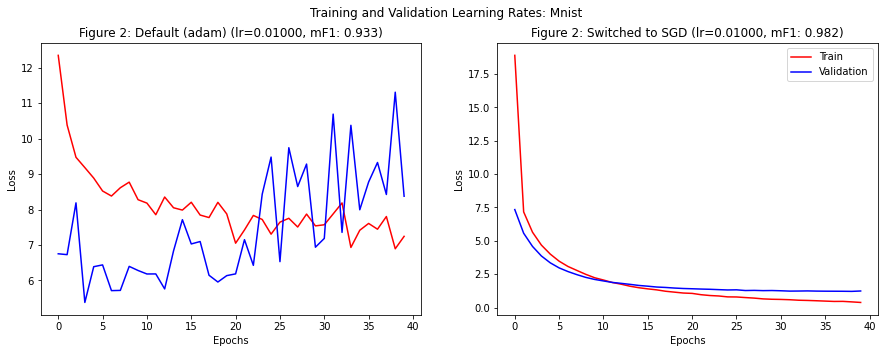

In [7]:
# plot the results
facade.result_manager.get_grapher().plot_loss([default_res, with_sgd_res])